In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reddit_posts = pd.read_csv('post_dataset.tsv', encoding='utf-16', sep='\t')

In [3]:
PLOTS_DIR = 'plots/'

In [4]:
print(reddit_posts['verdict'].value_counts())

verdict
YTA    433
NTA    390
Name: count, dtype: int64


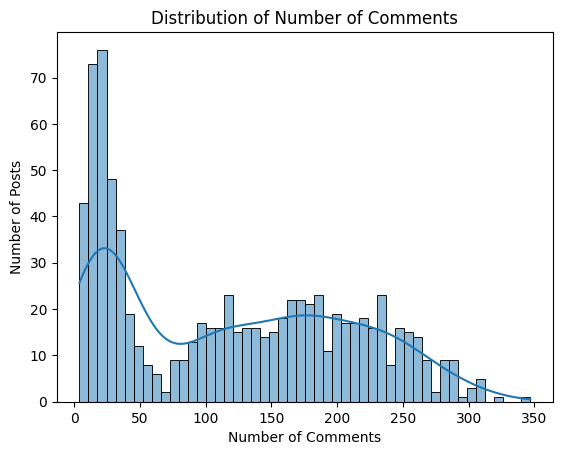

In [7]:
# Distribution of total number of comments
sns.histplot(reddit_posts['total comments'], bins=50, kde=True)
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.title('Distribution of Number of Comments')
plt.savefig(PLOTS_DIR + 'comments_distribution.png')
plt.show()

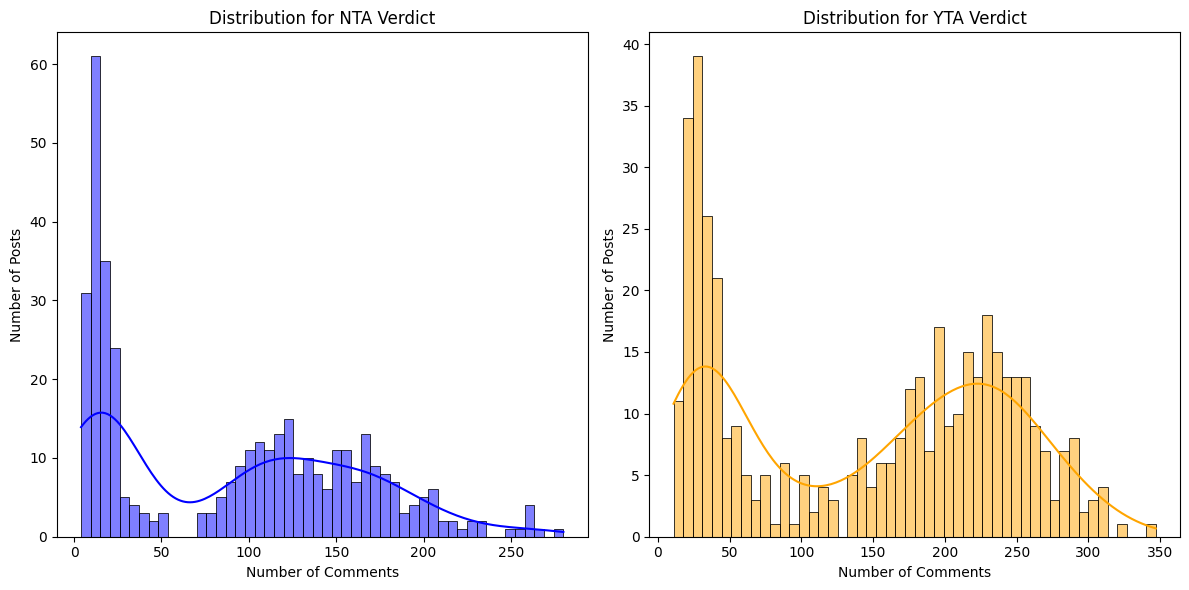

In [9]:
# Distribution of total number of comments per verdict
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(reddit_posts[reddit_posts['verdict'] == 'NTA']['total comments'], bins=50, ax=ax[0], color='blue', kde=True)
ax[0].set_xlabel('Number of Comments')
ax[0].set_ylabel('Number of Posts')
ax[0].set_title('Distribution for NTA Verdict')

sns.histplot(reddit_posts[reddit_posts['verdict'] == 'YTA']['total comments'], bins=50, ax=ax[1], color='orange', kde=True)
ax[1].set_xlabel('Number of Comments')
ax[1].set_ylabel('Number of Posts')
ax[1].set_title('Distribution for YTA Verdict')

plt.tight_layout()
plt.savefig(PLOTS_DIR + 'comments_distribution_per_verdict.png')
plt.show()

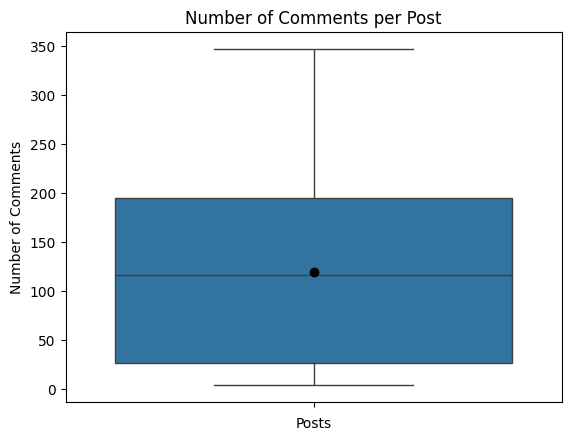

In [7]:
sns.boxplot(
    y=reddit_posts['total comments'], showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'black', 'markeredgecolor':'black'},
    flierprops={'marker':'x', 'markerfacecolor':'red', 'markeredgecolor':'red'}
)
plt.xlabel('Posts')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Post')
plt.show()

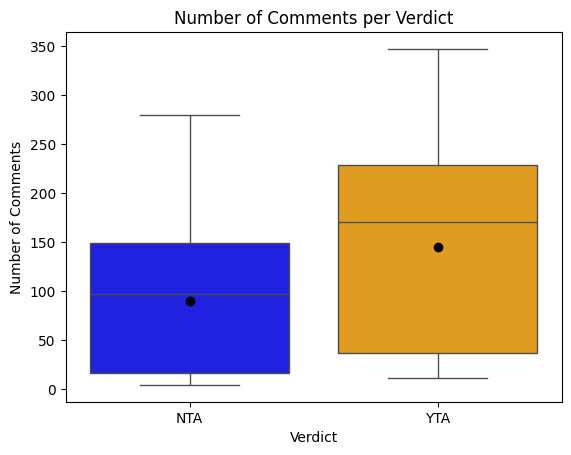

In [8]:
# boxplot of total comments per verdict
sns.boxplot(
    x='verdict', y='total comments', data=reddit_posts, showmeans=True,
    palette={'NTA':'blue', 'YTA':'orange'}, hue='verdict',
    meanprops={'marker':'o', 'markerfacecolor':'black', 'markeredgecolor':'black'},
    flierprops={'marker':'x', 'markerfacecolor':'red', 'markeredgecolor':'red'}
)
plt.xlabel('Verdict')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Verdict')
plt.savefig(PLOTS_DIR + 'comments_per_verdict.png')
plt.show()

In [9]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [10]:
# Find the most common words/topics in the titles

stop_words = set(stopwords.words('english'))
stop_words.update(string.punctuation)
keywords = [
    'aita', 'wibta', 'aitah', 'telling', 'asking', 'wanting', 'saying', 'giving',
    'refusing', 'letting', 'calling', 'making', 'taking', 'getting', 'going', 'leaving',
    'go', 'get', 'give', 'say', 'tell', 'ask', 'want', 'need', 'let', 'take', 'told',
]

title_words = reddit_posts['title'].apply(lambda x: word_tokenize(x.lower()))
title_words = title_words.apply(lambda x: [word for word in x if word not in stop_words])
title_words = title_words.apply(lambda x: [word for word in x if word.isalpha()])
title_words = title_words.apply(lambda x: [word for word in x if word not in keywords])

word_counts = Counter()
for words in title_words:
    word_counts.update(words)

most_common_words = word_counts.most_common(30)
most_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

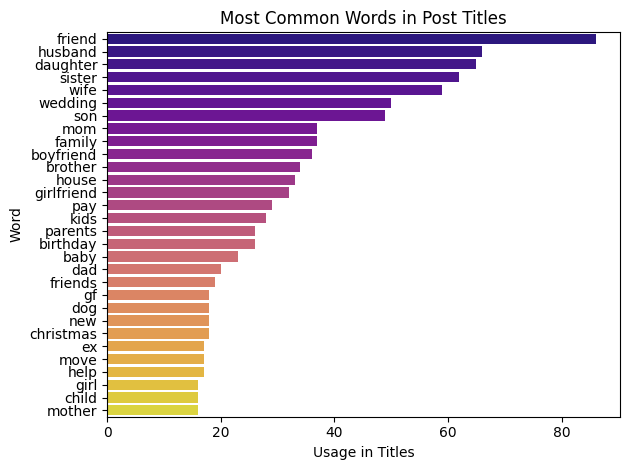

In [11]:
sns.barplot(x='Count', y='Word', data=most_common_words, palette='plasma', hue='Word', dodge=False)
plt.xlabel('Usage in Titles')
plt.ylabel('Word')
plt.title('Most Common Words in Post Titles')
plt.tight_layout()
plt.savefig(PLOTS_DIR + 'most_common_words.png')
plt.show()